In [1]:
import pandas as pd
import numpy as np 
import re 
import csv 
import matplotlib.pyplot as plt 


In [2]:
def find_rt(text): 
    try: 
        res  = re.search( r'(?<=RT \@)[A-Za-z0-9_]+',text )
    except: 
        return np.nan
    if res is not None: 
        return res.group(0)
    else: 
        return np.nan

In [5]:
df = pd.read_csv('/mnt/39b89ea8-8334-43c3-b50b-918be75d4569/Dropbox/Momolbox/paper/surv_cap/data/v2/twitter/2021/amazon_2021_fix.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'author_id', 'created_at', 'text', 'geo', 'lang',
       'public_metrics', 'id', 'entities', 'user_scr_name', 'username',
       'retweeted_status', 'rt_followers', 'retweet_count', 'comm_count',
       'favorite_count', 'exp_url', 'unif_text'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,author_id,id,rt_followers,retweet_count,comm_count,favorite_count
count,456938.000000,4.569380e+05,4.569380e+05,1.637990e+05,170011.000000,170011.000000,170011.000000
mean,135762.167303,5.157046e+17,1.409399e+18,1.623826e+05,146.020163,14.572069,1066.818665
std,90768.541440,5.900437e+17,3.701727e+16,7.515157e+05,295.243398,44.002310,2898.131613
min,0.000000,3.637000e+03,1.344454e+18,0.000000e+00,0.000000,0.000000,0.000000
25%,60331.250000,4.826403e+08,1.376085e+18,1.754000e+03,4.000000,0.000000,12.000000
50%,120913.500000,3.077122e+09,1.408579e+18,8.947000e+03,24.000000,1.000000,87.000000
75%,206221.500000,1.140542e+18,1.438147e+18,4.308300e+04,118.000000,9.000000,551.000000
max,326454.000000,1.476348e+18,1.477067e+18,9.763716e+06,1748.000000,486.000000,18564.000000


In [8]:
df.shape

(456938, 18)

In [9]:
df = df.drop_duplicates(subset=['id'])

In [10]:
len(df)

431556

In [11]:
df.isna().sum().sum()

2097776

## pulizia dati

In [13]:
df['id'].isna().sum()

0

In [14]:
df['entities'].isna().sum()

35558

In [15]:
df.duplicated(['id']).sum()

0

In [16]:
df.duplicated(['entities']).sum()

214984

In [17]:
df.apply(lambda row: row.duplicated()).sum()

Unnamed: 0          115717
author_id           321146
created_at            9913
text                144950
geo                 430563
lang                431552
public_metrics      423754
id                       0
entities            214984
user_scr_name       321032
username            332002
retweeted_status    397317
rt_followers        423931
retweet_count       431295
comm_count          431470
favorite_count      430829
exp_url             334973
unif_text           176059
dtype: int64

In [18]:
df = df.drop_duplicates(subset=['id'])

In [19]:
df = df.dropna(subset=['id'])

## analisi descrittive 

<AxesSubplot:xlabel='date'>

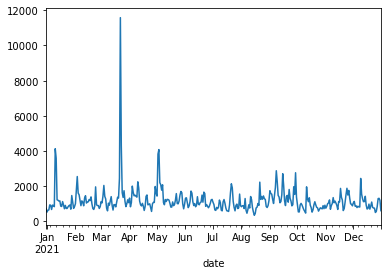

In [20]:
%matplotlib inline

df['date'] = pd.to_datetime(df['created_at'])

time_trend = df.resample('D', on='date')['id'].count()

time_trend.plot()

In [21]:
df_nort = df.drop_duplicates(subset=['retweeted_status'])

time_trend_mean = df_nort.resample('D', on='date')['retweet_count'].mean()

In [22]:
time_trend_mean

date
2020-12-31 00:00:00+00:00     3.224490
2021-01-01 00:00:00+00:00     2.689655
2021-01-02 00:00:00+00:00     3.918919
2021-01-03 00:00:00+00:00    25.227273
2021-01-04 00:00:00+00:00     1.709091
                               ...    
2021-12-27 00:00:00+00:00     6.823529
2021-12-28 00:00:00+00:00    26.200000
2021-12-29 00:00:00+00:00    10.244681
2021-12-30 00:00:00+00:00    15.438202
2021-12-31 00:00:00+00:00    26.704918
Freq: D, Name: retweet_count, Length: 366, dtype: float64

In [23]:
df.user_scr_name.value_counts().head(30)

kakaka_xrp        8117
weiweidayodayo    7188
MPenikas          5775
infoitscienza     4678
IlConteIT         3124
puntotweet        2078
UPrezzo           1969
ANTEO17           1841
infoiteconomia    1776
CaputoItalo       1765
AdrianVelascoS    1596
stefanodonno75    1519
PortaleOfferte    1414
VivaLowCost       1260
BidIsOk           1128
info_lavoro       1071
telefoninonet     1069
zazoomblog        1048
AmazonHelp        1036
NapolitanoIda     1007
piccolojason       981
con_la_J           872
isadoralarosa      857
andreastoolbox     854
ameliapepe1        854
m_spagna           849
lindaeciao         810
HDblog             772
takkendaze         696
Shusei_NFT         694
Name: user_scr_name, dtype: int64

In [24]:
df.retweeted_status.value_counts().head(30)

Bezos è andato nello spazio per 10 minuti. I dipendenti di Amazon ne hanno approfittato per andare in bagno.                                                                                                                                                                                                      1644
AMAZON LA TOCCA PIANISSIMO HAHAHAHAHAHAHA https://t.co/YOV814xwtm                                                                                                                                                                                                                                                 1098
Vi chiedo un favore. Umilmente, perché stasera sono proprio giù.\nRetwittatemi il libro. È l'unica mia fonte di reddito.\nE pensare che l'avevo conservato per un editore di settore... Ho dovuto metterlo su Amazon. Perché ho due figli da mantenere e sono STUFA AGRA di essere a zero.                        1047
+++ DRAGHI NOMINA JEFF BEZOS AL POSTO DI ARCURI.  GIÀ PIANIFICATA L

In [25]:
df['rt_author'] = df['text'].apply(find_rt)
df['rt_author'].value_counts().head(30)

MPenikas           4058
MarcoRizzoPC       3476
amici_da           2425
EStradini          1836
puntotweet         1691
GianniCuperIoPD    1644
AmazonNewsItaly    1503
anikeatable        1498
carloalberto       1092
robianchin         1058
CalcioFinanza       994
fattoquotidiano     939
canazza_            923
VittorioSgarbi      819
miinelauva          805
reportrai3          783
HDblog              710
lorepregliasco      696
Corriere            694
91Sara17            684
juventusfc          672
Alyenante           663
iesovcors           651
OfferteSconti21     635
FaccioTommaso       625
collettiva_news     621
pietroraffa         602
NatureCutsTags      588
amnestyitalia       583
repubblica          553
Name: rt_author, dtype: int64

## rt network

In [30]:
df_rts = df.dropna(subset=['rt_author'])

df_rts[['user_scr_name','rt_author']].rename(columns={'user_scr_name':'SOURCE','rt_author':'TARGET'}).to_csv('rt_network.csv',index=None)

## ht network

In [63]:
from itertools import combinations


df = pd.read_csv('/mnt/mass_drive/Dropbox/Dropbox/Momolbox/paper/h2020_marcello/data/it/iussoli_lang_it.csv')

In [64]:
hts =  df['text'].str.findall(r'(\#\w+)').tolist()

In [73]:
edges = []

for h_row in hts: 
    if len(h_row)>1: 
        for edge in combinations(h_row,2): 
            edges.append(edge)


In [77]:
df_edges =pd.DataFrame(edges, columns=['SOURCE','TARGET'])

df_edges.to_csv('ht_network.csv',index=None)

## conta hts e menzioni 

In [36]:
df_rts = df_rts.set_index('date')


df_peak = df_rts['2021-03-22']


df_peak[['user_scr_name','rt_author']].rename(columns={'user_scr_name':'SOURCE','rt_author':'TARGET'}).to_csv('rt_network_peak.csv',index=None)



/tmp/ipykernel_44165/1129686922.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_peak = df_rts['2021-03-22']


In [74]:
mnts = df_peak['text'].str.extractall(r'(\@\w+)')[0].value_counts()
hts = df_peak['text'].str.extractall(r'(\#\w+)')[0].value_counts()

In [75]:
hts

#Amazon                  4451
#sciopero                 716
#ScioperoAmazon           261
#22Marzo                  180
#Cisl                     152
                         ... 
#DoğduğunEvKaderindir       1
#calumhoodisoverparty       1
#AmazonSpecials             1
#Jungle                     1
#shootingra                 1
Name: 0, Length: 243, dtype: int64

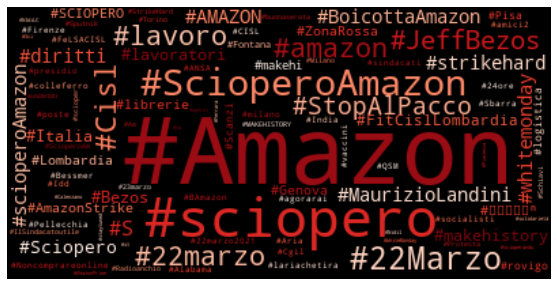

In [80]:
%matplotlib inline


from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=500, colormap='Reds')
wc.generate_from_frequencies(hts)



plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


## conta url

In [34]:
df.exp_url.dropna().value_counts()

http://goo.gl/cnOk4f                                                                                                                                                                         1928
https://twitter.com/anikeatable/status/1435530323291480068/photo/1                                                                                                                           1099
https://twitter.com/miinelauva/status/1381012368520585216/photo/1                                                                                                                             806
https://twitter.com/happinessseb/status/1414518318699106313/photo/1                                                                                                                           512
https://ift.tt/2T46jSI                                                                                                                                                                        366
                              

In [35]:
from urllib.parse import urlparse



def find_domain(exp_url):
    if pd.notnull(exp_url):
        return urlparse(exp_url).netloc
    else:
        return np.NaN



df['domain'] = df['exp_url'].apply(find_domain)

In [36]:
df['domain'].value_counts()

twitter.com              41376
dlvr.it                  11448
www.informazione.it       7518
ift.tt                    6983
bit.ly                    4625
                         ...  
website.cc.lerjin.com        1
nouveau-monde.ca             1
drieditore.it                1
rispondere.Il                1
awsitaly.claranet.it         1
Name: domain, Length: 5885, dtype: int64

<AxesSubplot:xlabel='date'>

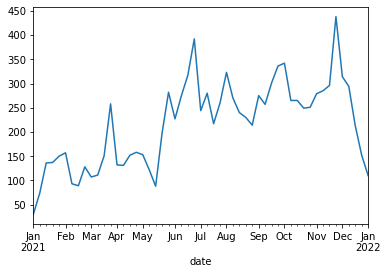

In [52]:
dlvr_mask =df[df['domain'].str.contains('dlvr.it').fillna(False)]
dlvr_mask.resample('W', on='date')['id'].count().plot()

## estraz sample

In [26]:
sample = df.sample(1000)

# sample top

rts = df['rt_author'].value_counts()

top_rts = rts[rts >= rts.quantile(.9)].index.tolist()


sample_top = df[df['rt_author'].isin(top_rts)].sample(1000)

#sample bottom

sample_bottom = df[~df['user_scr_name'].isin(rts.index.tolist())].sample(1000)

